In [86]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression


data = pd.read_csv('Student_Performance.csv', index_col=0)
data.head(5)

,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,,,,,
7,99,Yes,9,1,91.0
4,82,No,4,2,65.0
8,51,Yes,7,2,45.0
5,52,Yes,5,2,36.0
7,75,No,8,5,66.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 7 to 7
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Previous Scores                   10000 non-null  int64  
 1   Extracurricular Activities        10000 non-null  object 
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 468.8+ KB


In [4]:
data.isnull().sum()

Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:

le = LabelEncoder()
data['Extracurricular Activities'] = le.fit_transform(data['Extracurricular Activities'])


In [6]:
data.head()


,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,,,,,
7,99,1,9,1,91.0
4,82,0,4,2,65.0
8,51,1,7,2,45.0
5,52,1,5,2,36.0
7,75,0,8,5,66.0


In [17]:
data.drop(columns= 'Extracurricular Activities')

,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,,,,
7,99,9,1,91.0
4,82,4,2,65.0
8,51,7,2,45.0
5,52,5,2,36.0
7,75,8,5,66.0
...,...,...,...,...
1,49,4,2,23.0
7,64,8,5,58.0
6,83,8,5,74.0


In [76]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.1,shuffle=True)

# Model Training 


In [77]:
Lin_Regression = LinearRegression()
Lin_Regression.fit(X_train,y_train)

LinearRegression()

In [78]:
training = Lin_Regression.predict(X_train)

In [79]:
error_score = metrics.r2_score(y_train, training)
print(f"the R squared error {error_score}")

the R squared error 0.84128615717879



# Model Testing

In [80]:
Lin_Regression.fit(X_train,y_train)

testing = Lin_Regression.predict(X_test)
error_score_test = metrics.r2_score(y_test, testing)
print(f"the R squared error {error_score_test}")

the R squared error 0.8381231824873263


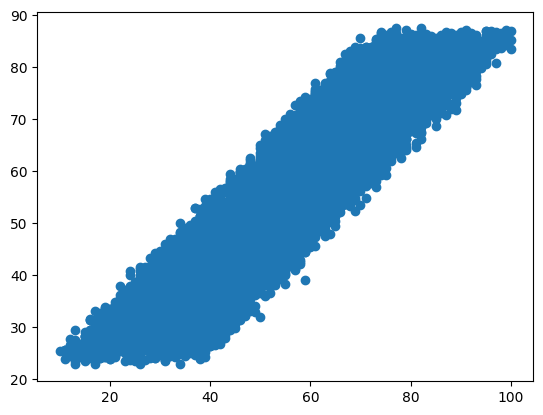

In [81]:
plt.scatter(y_train, training)
plt.show()

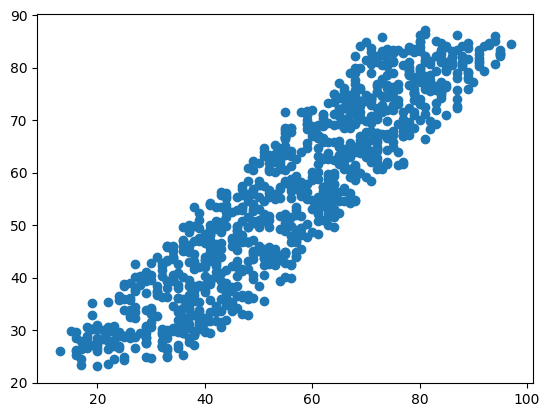

In [82]:
plt.scatter(y_test, testing)
plt.show()

In [83]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [84]:
train_lasso = lasso.predict(X_train)
Error_lasso_train = metrics.r2_score(y_train, train_lasso)
print(f"the R squared error {Error_lasso_train}")

the R squared error 0.8397422057924219


In [85]:
test_lasso = lasso.predict(X_test)
Error_lasso_test = metrics.r2_score(y_test,test_lasso)
print(f"the R squared error {Error_lasso_test}")

the R squared error 0.8347812024882162
